In [1]:
# pandas-profiling 설치
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 261 kB 5.0 MB/s 
     |████████████████████████████████| 102 kB 10.9 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 690 kB 36.5 MB/s 
     |████████████████████████████████| 596 kB 46.9 MB/s 
     |████████████████████████████████| 11.1 MB 38.8 MB/s 
     |████████████████████████████████| 3.1 MB 3.3 MB/s 
     |████████████████████████████████| 303 kB 42.2 MB/s 
     |████████████████████████████████| 812 kB 57.0 MB/s 
     |████████████████████████████████| 38.1 MB 59.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=b62d1ca84da1a08496acb947caa0bc3e5a54102934459c5b858861620f38a1c6
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3

In [2]:
# category_encoders 설치
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 3.4 MB/s 


In [3]:
# eli5 설치
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.3 MB/s 
     |████████████████████████████████| 133 kB 44.8 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=c521473566b08811219398fabd9ba9888005d0e97e17c8e3ee824d29a88f2dcc
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which i

In [4]:
# 필요한 라이브러리 import
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from category_encoders import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint, uniform
import eli5
from eli5.sklearn import PermutationImportance
import warnings
warnings.filterwarnings('ignore') # Warning 제거

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df1 = pd.read_json('/content/drive/MyDrive/project/section2/data/1_문항정오답표.json')
df1 = df1.drop(['Timestamp'], axis='columns') # 분석에 불필요한 Timestamp column 제거
df1

,learnerID,learnerProfile,testID,assessmentItemID,answerCode
0,A080001187,M;S01;8,A080000038,A080038004,1
1,A020002315,F;S01;2,A020000182,A020182005,1
2,A060000089,F;S01;6,A060000003,A060003002,1
3,A090000220,F;S01;9,A090000024,A090024007,1
4,A040000243,M;S01;4,A040000134,A040134004,1
...,...,...,...,...,...
2526695,A040000610,F;S01;4,A040000027,A040027009,1
2526696,A030000345,F;S01;3,A030000117,A030117002,0
2526697,A020002056,F;S01;2,A020000173,A020173003,1
2526698,A050000702,M;S01;5,A050000070,A050070006,0


In [6]:
df2 = pd.read_json('/content/drive/MyDrive/project/section2/data/2_문항IRT.json')
df2 = df2.drop(['Timestamp','knowledgeTag'], axis='columns') # 분석에 불필요한 Timestamp, knowledgeTag column 제거
df2

,testID,assessmentItemID,difficultyLevel,discriminationLevel,guessLevel
0,A010000059,A010059006,-0.684622,1.398660,5.967000e-07
1,A090000024,A090024002,0.450468,4.460122,2.381760e-05
2,A030000160,A030160002,-0.390290,1.961060,2.142000e-07
3,A050000017,A050017006,-1.332508,1.651489,7.502948e-04
4,A090000058,A090058006,0.085875,17.158927,1.148290e-01
...,...,...,...,...,...
9449,A070000070,A070070008,0.722019,2.424602,4.236600e-05
9450,A030000155,A030155003,0.804980,6.058800,2.980439e-01
9451,A080000104,A080104002,0.377083,1.994901,1.263354e-01
9452,A070000150,A070150001,-0.933019,2.435913,1.433495e-16


In [7]:
df3 = pd.read_json('/content/drive/MyDrive/project/section2/data/3_응시자IRT.json')
df3 = df3.drop(['Timestamp'], axis='columns') # 분석에 불필요한 Timestamp column 제거
df3

,learnerID,learnerProfile,testID,theta,realScore
0,A010000001,F;S01;1,A010000001,0.196765,0.967829
1,A010000002,M;S01;1,A010000001,0.196765,0.967829
2,A010000003,F;S01;1,A010000001,0.196765,0.967829
3,A010000006,F;S01;1,A010000001,-1.359208,0.791475
4,A010000007,M;S01;1,A010000001,0.196765,0.967829
...,...,...,...,...,...
415295,A090000496,M;S01;9,A090000074,-0.751697,0.196431
415296,A090000497,F;S01;9,A090000074,-0.538317,0.217529
415297,A090000552,M;S01;9,A090000074,0.785694,0.706491
415298,A090000600,M;S01;9,A090000074,-0.082965,0.285273


In [8]:
df_temp = pd.merge(df1, df2) # 3개의 dataframe을 합치기 위해 우선 df1과 df2 merge
df_temp

,learnerID,learnerProfile,testID,assessmentItemID,answerCode,difficultyLevel,discriminationLevel,guessLevel
0,A080001187,M;S01;8,A080000038,A080038004,1,-0.360178,2.172366,3.620450e-05
1,A080000942,M;S01;8,A080000038,A080038004,1,-0.360178,2.172366,3.620450e-05
2,A080000329,F;S01;8,A080000038,A080038004,1,-0.360178,2.172366,3.620450e-05
3,A080001053,F;S01;8,A080000038,A080038004,1,-0.360178,2.172366,3.620450e-05
4,A080001248,M;S01;8,A080000038,A080038004,0,-0.360178,2.172366,3.620450e-05
...,...,...,...,...,...,...,...,...
2526695,A050002828,M;S01;5,A050000001,A050001003,0,0.016911,2.258198,7.119000e-07
2526696,A050002308,F;S01;5,A050000001,A050001003,0,0.016911,2.258198,7.119000e-07
2526697,A050002703,M;S01;5,A050000001,A050001003,1,0.016911,2.258198,7.119000e-07
2526698,A050002846,M;S01;5,A050000001,A050001003,1,0.016911,2.258198,7.119000e-07


In [9]:
df = pd.merge(df3, df_temp) # 3개의 dataframe 모두 합치기
df

,learnerID,learnerProfile,testID,theta,realScore,assessmentItemID,answerCode,difficultyLevel,discriminationLevel,guessLevel
0,A010000001,F;S01;1,A010000001,0.196765,0.967829,A010001002,1,-2.917577,1.349719,1.278008e-02
1,A010000001,F;S01;1,A010000001,0.196765,0.967829,A010001001,1,-3.719715,0.721179,1.008904e-02
2,A010000001,F;S01;1,A010000001,0.196765,0.967829,A010001003,1,-2.273138,1.192981,5.012783e-02
3,A010000001,F;S01;1,A010000001,0.196765,0.967829,A010001005,1,-1.611647,1.911265,2.348796e-04
4,A010000001,F;S01;1,A010000001,0.196765,0.967829,A010001004,1,-2.302867,1.732754,6.223898e-03
...,...,...,...,...,...,...,...,...,...,...
2526695,A090000616,M;S01;9,A090000074,1.053203,0.766541,A090074002,1,0.012002,54.381941,2.930000e-08
2526696,A090000616,M;S01;9,A090000074,1.053203,0.766541,A090074005,1,2.126145,0.240034,3.483607e-02
2526697,A090000616,M;S01;9,A090000074,1.053203,0.766541,A090074001,1,0.701092,2.197370,5.296149e-02
2526698,A090000616,M;S01;9,A090000074,1.053203,0.766541,A090074004,1,0.450923,4.251689,0.000000e+00


In [10]:
# pandas-profiling을 통해 데이터 살펴보기
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

pandas-profiling을 통해 데이터를 살펴본 결과 다음과 같은 문제를 발견   
- learnerID, testID, assessmentItemID column이 high cardinality를 가짐   
high cardinality를 가지는 column들은 모두 제거할 예정   

In [11]:
df = df.drop(['learnerID', 'testID', 'assessmentItemID'], axis='columns') # high cardinality를 가지는 column 제거
df

,learnerProfile,theta,realScore,answerCode,difficultyLevel,discriminationLevel,guessLevel
0,F;S01;1,0.196765,0.967829,1,-2.917577,1.349719,1.278008e-02
1,F;S01;1,0.196765,0.967829,1,-3.719715,0.721179,1.008904e-02
2,F;S01;1,0.196765,0.967829,1,-2.273138,1.192981,5.012783e-02
3,F;S01;1,0.196765,0.967829,1,-1.611647,1.911265,2.348796e-04
4,F;S01;1,0.196765,0.967829,1,-2.302867,1.732754,6.223898e-03
...,...,...,...,...,...,...,...
2526695,M;S01;9,1.053203,0.766541,1,0.012002,54.381941,2.930000e-08
2526696,M;S01;9,1.053203,0.766541,1,2.126145,0.240034,3.483607e-02
2526697,M;S01;9,1.053203,0.766541,1,0.701092,2.197370,5.296149e-02
2526698,M;S01;9,1.053203,0.766541,1,0.450923,4.251689,0.000000e+00


In [12]:
df = df.sample(frac=0.05, random_state=42) # 데이터 row가 약 250만개로 학습에 시간이 많이 소요되어 5%만큼 샘플링
df = df.reset_index(drop=True)
df

,learnerProfile,theta,realScore,answerCode,difficultyLevel,discriminationLevel,guessLevel
0,F;S01;5,-0.225328,0.609775,0,0.148066,2.380904,0.000000e+00
1,F;S01;3,-0.688438,0.270194,0,-0.390290,1.961060,2.142000e-07
2,M;S01;7,-0.264354,0.408418,1,0.244859,1.597181,1.305070e-01
3,F;S01;7,-0.873469,0.194276,0,0.350193,2.821289,1.088840e-05
4,M;S01;6,0.142361,0.977252,1,-2.459132,2.125493,5.615428e-189
...,...,...,...,...,...,...,...
126330,F;S01;9,-0.929632,0.234834,0,-0.292086,0.985872,3.454963e-02
126331,F;S01;8,-0.070650,0.415711,1,0.060262,2.798896,5.155006e-02
126332,F;S01;8,0.827117,0.910442,1,0.304727,0.755963,0.000000e+00
126333,F;S01;3,0.467690,0.856055,1,-0.395219,1.193584,6.279716e-02


In [13]:
# 데이터 타입 확인
df.dtypes

learnerProfile          object
theta                  float64
realScore              float64
answerCode               int64
difficultyLevel        float64
discriminationLevel    float64
guessLevel             float64
dtype: object

In [14]:
# 수치형 데이터 대표값 확인
df.describe()

,theta,realScore,answerCode,difficultyLevel,discriminationLevel,guessLevel
count,126335.000000,126335.000000,126335.000000,126335.000000,126335.000000,1.263350e+05
mean,-0.014290,0.660876,0.652559,-0.546065,5.921556,5.363340e-02
std,0.724186,0.259510,0.476159,1.020412,70.746547,9.383728e-02
min,-2.873413,0.033541,0.000000,-4.959177,0.088711,0.000000e+00
25%,-0.512436,0.463203,0.000000,-1.289589,1.458568,3.801000e-07
50%,0.069190,0.739923,1.000000,-0.498250,2.083453,2.988230e-04
75%,0.509829,0.880817,1.000000,0.204025,3.229959,6.371738e-02
max,2.176714,0.999633,1.000000,4.264684,4625.002155,3.000000e-01


In [15]:
# 결측치 여부 확인
# 결측치는 없다
df.isnull().sum()

learnerProfile         0
theta                  0
realScore              0
answerCode             0
difficultyLevel        0
discriminationLevel    0
guessLevel             0
dtype: int64

In [16]:
# 타겟 특성은 answerCode(정답 여부)
target = 'answerCode'
print(f'타겟 특성 최빈값 : {df[target].value_counts().head(1)}') # 분류 문제이므로 타겟 특성 최빈값 확인

타겟 특성 최빈값 : 1    82441
Name: answerCode, dtype: int64


In [17]:
# 타겟 특성 클래스 별 비율 확인
print('클래스 별 비율')
for i in range(len(df[target].value_counts())):
  print(f'{df[target].value_counts()[{i}] / len(df) * 100}%')

클래스 별 비율
0    34.744133
Name: answerCode, dtype: float64%
1    65.255867
Name: answerCode, dtype: float64%


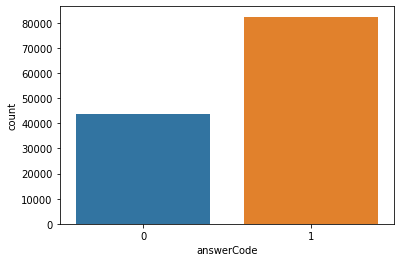

In [18]:
# 타겟 데이터 범주 비율 시각화
%matplotlib inline
sns.countplot(x=df[target]);

상단을 통해 타겟 클래스의 다수 클래스 비율이 65% 정도임을 알 수 있음   
따라서 평가 지표는 accuracy만 사용

데이터를 8:2 비율로 train, test 데이터셋으로 나누고 train 데이터셋을 한번 더 4:1 비율로 train, val 데이터셋으로 나누어 진행   
즉 train, val, test 데이터셋을 6:2:2 비율로 나누어 진행

In [19]:
# train, test 데이터셋 나누기
train, test = train_test_split(df, train_size=0.8, random_state=42)
print(f'train shape : {train.shape}')
print(f'test shape : {test.shape}')

train shape : (101068, 7)
test shape : (25267, 7)


In [20]:
# train, val 데이터셋 나누기
train, val = train_test_split(train, train_size=0.75, random_state=42)
print(f'train shape : {train.shape}')
print(f'val shape : {val.shape}')

train shape : (75801, 7)
val shape : (25267, 7)


In [21]:
# train, val, test 데이터셋 각각 X, y로 분리
features = df.columns.drop([target])

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

print(f'X_train shape : {X_train.shape}')
print(f'X_val shape : {X_val.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_val shape : {y_val.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (75801, 6)
X_val shape : (25267, 6)
X_test shape : (25267, 6)
y_train shape : (75801,)
y_val shape : (25267,)
y_test shape : (25267,)


우선 타겟 특성의 최빈값을 기준모델로 설정

In [22]:
# 기준모델 설정(최빈값)
major = y_val.mode()[0]

y_pred = [major] * len(y_val)

In [23]:
# 기준모델  정확도 확인
print(f'val accuracy score(Base) : {accuracy_score(y_val, y_pred)}')

val accuracy score(Base) : 0.6521945620770174


인코딩은 OrdinalEncoding   
분류 모델은 RandomForest 사용 (RandomizedSearchCV로 하이퍼파라미터 튜닝)   
평가지표는 accuracy를 사용

In [24]:
# 파이프라인 구축
randomforest_pipe = Pipeline([
    ('ordinal',OrdinalEncoder()),
    ('randomforest' ,RandomForestClassifier())
])

# 하이퍼 파라미터 범위 지정
dist = {
    'randomforest__n_estimators': randint(50, 500), 
    'randomforest__max_depth': [5, 10, 15, 20, None], 
    'randomforest__max_features': uniform(0, 1), 
    'randomforest__min_samples_leaf' : randint(5, 20)
}

# RandomizedSearchCV를 통해 최적의 하이퍼파라미터 찾기
clf = RandomizedSearchCV(
    randomforest_pipe,
    param_distributions=dist,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    random_state=42

)

clf.fit(X_train, y_train)
print(f'최적 하이퍼파라미터: {clf.best_params_}')
print(f'Accuracy Socre: {clf.best_score_}')

최적 하이퍼파라미터: {'randomforest__max_depth': 20, 'randomforest__max_features': 0.9385527090157502, 'randomforest__min_samples_leaf': 6, 'randomforest__n_estimators': 241}
Accuracy Socre: 0.8609253176079471


In [25]:
# 최적의 하이퍼파라미터로 세팅
randomforest_pipe = clf.best_estimator_

# 검증 데이터를 통해 예측한 후 정확도와 혼동행렬 구하기
y_val_pred = randomforest_pipe.predict(X_val)
print(classification_report(y_val, y_val_pred))
print(f'val accuracy score(RandomForest): {accuracy_score(y_val_pred, y_val)}')

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      8788
           1       0.90      0.89      0.90     16479

    accuracy                           0.86     25267
   macro avg       0.85      0.85      0.85     25267
weighted avg       0.86      0.86      0.86     25267

val accuracy score(RandomForest): 0.864764317093442


기준모델 정확도 : 0.6521945620770174   
RandomForest 모델의 정확도 : 0.864764317093442   
따라서 기준 모델에 비해 RandomForest 모델의 정확도가 0.2125697550164246만큼 높다

In [26]:
# 파이프라인 구축
xgb_pipe = Pipeline([
    ('ordinal',OrdinalEncoder()),
    ('xgb' , XGBClassifier())
])

# 하이퍼 파라미터 범위 지정
dist = {
    'xgb__n_estimators': randint(50, 500), 
    'xgb__max_depth': [5, 10, 15, 20, None], 
    'xgb__learning_rate': uniform(0, 1)
}

# RandomizedSearchCV를 통해 최적의 하이퍼파라미터 찾기
clf = RandomizedSearchCV(
    xgb_pipe,
    param_distributions=dist,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    random_state=42

)

clf.fit(X_train, y_train)
print(f'최적 하이퍼파라미터: {clf.best_params_}')
print(f'Accuracy Socre: {clf.best_score_}')

최적 하이퍼파라미터: {'xgb__learning_rate': 0.14286681792194078, 'xgb__max_depth': 15, 'xgb__n_estimators': 199}
Accuracy Socre: 0.8560309230748935


In [27]:
# 최적의 하이퍼파라미터로 세팅
xgb_pipe = clf.best_estimator_

# 검증 데이터를 통해 예측한 후 정확도와 혼동행렬 구하기
y_val_pred = xgb_pipe.predict(X_val)
print(classification_report(y_val, y_val_pred))
print(f'val accuracy score(XGBoost): {accuracy_score(y_val_pred, y_val)}')

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      8788
           1       0.90      0.89      0.89     16479

    accuracy                           0.86     25267
   macro avg       0.85      0.85      0.85     25267
weighted avg       0.86      0.86      0.86     25267

val accuracy score(XGBoost): 0.8631416472078205


기준모델 정확도 : 0.6521945620770174   
XGBoost 모델의 정확도 : 0.8631416472078205      
따라서 기준 모델에 비해 XGBoost 모델의 정확도가 0.2109470851308031만큼 높다

기준모델 정확도 : 0.6516602683341909      
RandomForest 모델의 정확도 : 0.864764317093442   
XGBoost 모델의 정확도 : 0.8631416472078205   
따라서 RandomForest 모델의 정확도가 가장 높다

In [28]:
# 가장 정확도가 높은 모델의 test score 확인
y_test_pred = randomforest_pipe.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(f'test accuracy score(LogisticRegression): {accuracy_score(y_test_pred, y_test)}')

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      8749
           1       0.90      0.89      0.90     16518

    accuracy                           0.87     25267
   macro avg       0.85      0.85      0.85     25267
weighted avg       0.87      0.87      0.87     25267

test accuracy score(LogisticRegression): 0.8653183994934104


앞서 가장 성능이 높았던 RandomForest 모델로 test 데이터셋을 예측했을 때의 정확도 :  0.8658329045790952

In [29]:
# Permuter Importance 계산을 위한 permuter 정의
permuter = PermutationImportance(
    randomforest_pipe.named_steps['randomforest'],
    scoring='accuracy',
    n_iter=10,
    random_state=42
)

X_val_transformed = randomforest_pipe.named_steps['ordinal'].transform(X_val) # permuter 계산은 preprocessing 된 X_val를 사용

permuter.fit(X_val_transformed, y_val) # 실제로 fit 의미보다는 스코어를 다시 계산하는 작업

PermutationImportance(estimator=RandomForestClassifier(max_depth=20,
                                                       max_features=0.9385527090157502,
                                                       min_samples_leaf=6,
                                                       n_estimators=241),
                      n_iter=10, random_state=42, scoring='accuracy')

In [33]:
# permuter로 계산한 feature importance 내림차순 정렬해서 확인
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

theta                  0.185867
difficultyLevel        0.151122
realScore              0.052357
discriminationLevel    0.019227
guessLevel             0.003926
learnerProfile         0.000550
dtype: float64

In [31]:
# eli5 라이브러리를 이용해 확인
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
0.1859 ± 0.0037,theta
0.1511 ± 0.0044,difficultyLevel
0.0524 ± 0.0026,realScore
0.0192 ± 0.0020,discriminationLevel
0.0039 ± 0.0012,guessLevel
0.0006 ± 0.0012,learnerProfile
